# Pymaceuticals Inc.

In [1]:
# Observation 1
#Ther is a positive correlation between the mouse weight and the tumor volume. 
#As the weight increases so does the tumor volume. 

In [2]:
# Observation 2
# Out of the 4 treatments, only Infubinol had an outlier in its dataset. 

In [3]:
# Observation 3
# By analyzing the data it is clear that Ramicane and Capomulin are the most effective drugs.  

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mouse_count = merged_mouse_df["Mouse ID"].nunique()

mouse_count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_mouse_df.groupby(["Mouse ID","Timepoint"]).count()
                                     
duplicates.sort_values(["Sex"],ascending=False)

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     20                    2    2           2           2   
         15                    2    2           2           2   
         10                    2    2           2           2   
         5                     2    2           2           2   
         0                     2    2           2           2   
...                          ...  ...         ...         ...   
i334     20                    1    1           1           1   
         15                    1    1           1           1   
         10                    1    1           1           1   
         5                     1    1           1           1   
z969     45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     20                          2                 2  
         15                          2                 2  
         10                          2                 2  
         5                           2                 2  
         0                           2                 2  
...                                ...               ...  
i334     20                          1                 1  
         15                          1                 1  
         10                          1                 1  
         5                           1                 1  
z969     45                          1                 1  

[1888 rows x 6 columns]

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = merged_mouse_df[merged_mouse_df["Mouse ID"]=="g989"]

mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merged_mouse_df[merged_mouse_df["Mouse ID"]!="g989"]

clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame
clean_mouse_count = clean_mouse_df["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_mean = clean_mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mouse_median = clean_mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
mouse_variance = clean_mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
mouse_std_dev = clean_mouse_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

clean_mouse_summary = pd.DataFrame({"Mean Tutor Volume":mouse_mean,
                                    "Median Tutor Volume":mouse_median,
                                    "Variance Tutor Volume":mouse_variance,
                                   "Std Dev Tutor Volume":mouse_std_dev})

clean_mouse_summary

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean Tutor Volume,Median Tutor Volume,Variance Tutor Volume,Std Dev Tutor Volume
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

clean_mouse_summary2 = clean_mouse_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

clean_mouse_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

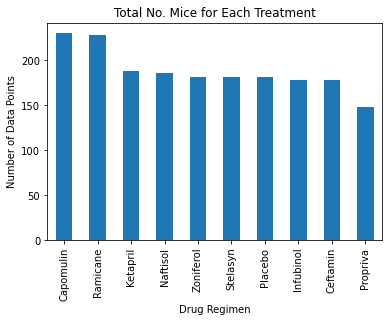

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_bar1 = clean_mouse_df["Drug Regimen"].value_counts().plot(kind="bar")

plt.title("Total No. Mice for Each Treatment")
mouse_bar1.set_xlabel("Drug Regimen")
mouse_bar1.set_ylabel("Number of Data Points")

plt.show()

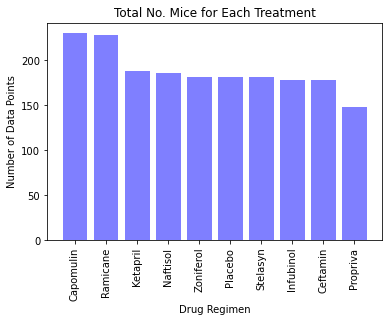

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_regimen_counts = clean_mouse_df["Drug Regimen"].value_counts()

x_axis = np.arange(len(drug_regimen_counts))
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Placebo", 
                            "Stelasyn","Infubinol","Ceftamin","Propriva"], rotation="vertical")
        
plt.bar(x_axis, drug_regimen_counts, facecolor="b", alpha=0.5, align="center")        

plt.title("Total No. Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")


plt.show()

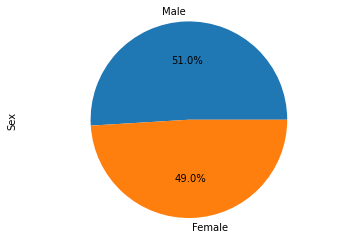

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_pie_df = clean_mouse_df["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%")

plt.axis("equal")
plt.show()

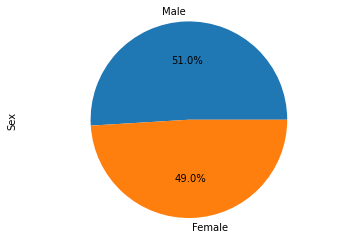

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_mouse_df["Sex"].value_counts()
sex = ["Male","Female"]
sex_count

plt.pie(sex_count, autopct="%1.1f%%", labels=sex, shadow=False)
plt.ylabel("Sex")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_tumor_volume = clean_mouse_df.groupby(["Drug Regimen"]).sum()['Tumor Volume (mm3)']

final_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_mouse_df.groupby(["Mouse ID"])['Timepoint'].max()
greatest_timepoint_df = greatest_timepoint.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mouse_df2 = greatest_timepoint_df.merge(clean_mouse_df, on=["Mouse ID","Timepoint"], how="left")
merged_mouse_df2.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for treatment in final_treatments:
    volume = merged_mouse_df2["Drug Regimen"] ==treatment
    vol_data = merged_mouse_df2.loc[volume, "Tumor Volume (mm3)"]
    

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    #Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = vol_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    tumor_vol_list.append(vol_data)
       
    # add subset 
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = vol_data.loc[(vol_data < lower_bound) | (vol_data > upper_bound)]
    print(f" {treatment} potential outliers: {outliers}")

 Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


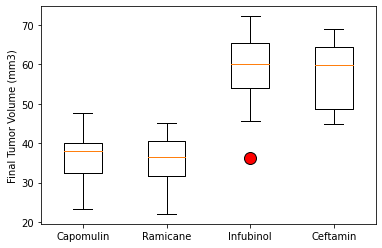

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_color = dict(markerfacecolor = 'r', markersize = 12)
plt.boxplot(tumor_vol_list, labels=final_treatments, flierprops = box_color)

plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

In [19]:
# Find a mouse ID that was treated with Capomulin
Capomulin_df = clean_mouse_df[clean_mouse_df["Drug Regimen"]=="Capomulin"]

Capomulin_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0.5, 0, 'Timepoint (Days)')

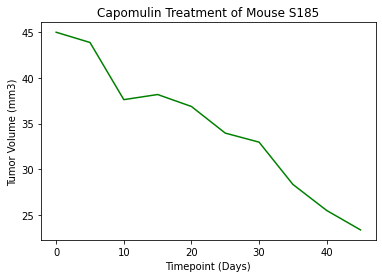

In [20]:
# Create dataframe for one mouse
Capomulin_reduced_df = Capomulin_df[Capomulin_df["Mouse ID"]=="s185"]

tumor_vol = Capomulin_reduced_df["Tumor Volume (mm3)"]
timepoint = Capomulin_reduced_df["Timepoint"]

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_S185, = plt.plot(timepoint, tumor_vol, color="green")

plt.title("Capomulin Treatment of Mouse S185")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")


In [21]:
# Find the average 
mouse_tumorvol_df = Capomulin_df.groupby(["Mouse ID"]).mean()
mouse_tumorvol_df.head()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


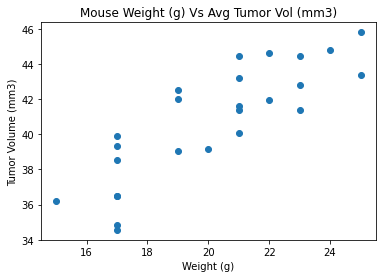

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(mouse_tumorvol_df['Weight (g)'], mouse_tumorvol_df['Tumor Volume (mm3)'])

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight (g) Vs Avg Tumor Vol (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


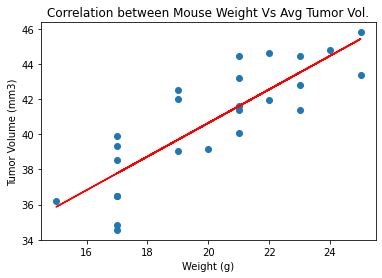

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_value = mouse_tumorvol_df['Weight (g)']
y_value = mouse_tumorvol_df['Tumor Volume (mm3)']
correlation = st.pearsonr(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Correlation between Mouse Weight Vs Avg Tumor Vol.")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()
